In [4]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprocessing,Standardizing

from sklearn.preprocessing import StandardScaler

#For Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Model Training and Testing

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Metrics

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,classification_report,plot_roc_curve

#Ignoring warning while plotting

import warnings
warnings.filterwarnings('ignore')

In [119]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\HR.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [52]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

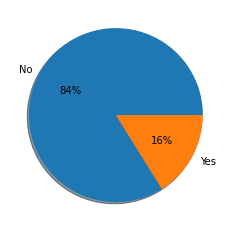

In [33]:
labels='No','Yes'

fig,ax=plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels=labels,autopct='%0.0f%%',shadow=True)

plt.show()

In [51]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

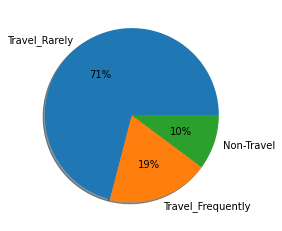

In [31]:
labels='Travel_Rarely','Travel_Frequently','Non-Travel'

fig,ax=plt.subplots()
ax.pie(df['BusinessTravel'].value_counts(),labels=labels,autopct='%0.0f%%',shadow=True)

plt.show()

In [50]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

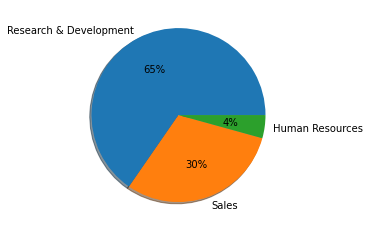

In [34]:
labels='Research & Development','Sales','Human Resources'

fig,ax=plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels,autopct='%0.0f%%',shadow=True)

plt.show()

In [49]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

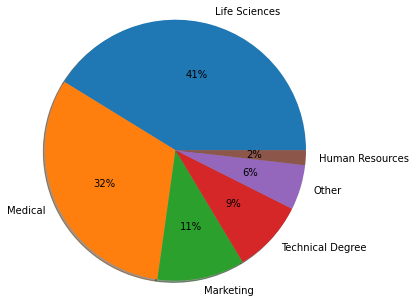

In [40]:
labels='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'

fig,ax=plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels,autopct='%0.0f%%',shadow=True,radius=1.5)

plt.show()

In [48]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

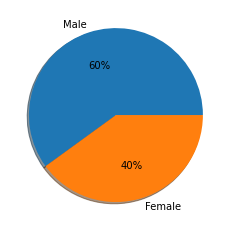

In [42]:
labels='Male','Female'

fig,ax=plt.subplots()
ax.pie(df['Gender'].value_counts(),labels=labels,autopct='%0.0f%%',shadow=True)

plt.show()

In [47]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

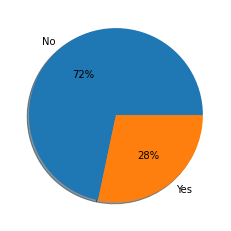

In [46]:
labels='No','Yes'

fig,ax=plt.subplots()
ax.pie(df['OverTime'].value_counts(),labels=labels,autopct='%0.0f%%',shadow=True)

plt.show()

In [53]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

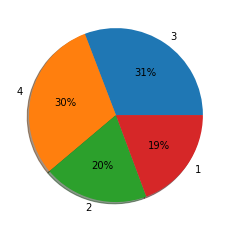

In [54]:
labels='3','4','2','1'

fig,ax=plt.subplots()
ax.pie(df['EnvironmentSatisfaction'].value_counts(),labels=labels,autopct='%0.0f%%',shadow=True)

plt.show()

In [56]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

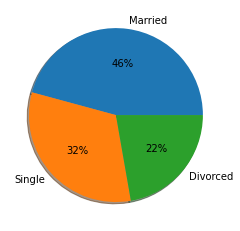

In [57]:
labels='Married','Single','Divorced'

fig,ax=plt.subplots()
ax.pie(df['MaritalStatus'].value_counts(),labels=labels,autopct='%0.0f%%',shadow=True)

plt.show()

In [58]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

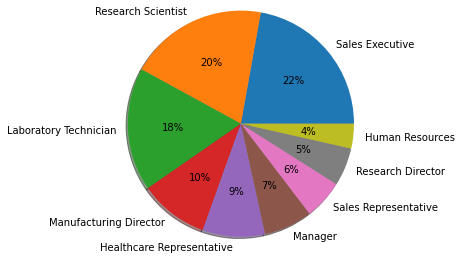

In [62]:
labels='Sales Executive','Research Scientist','Laboratory Technician','Manufacturing Director','Healthcare Representative','Manager','Sales Representative','Research Director','Human Resources'

fig,ax=plt.subplots()
ax.pie(df['JobRole'].value_counts(),labels=labels,autopct='%0.0f%%',shadow=True,radius=1.3)

plt.show()

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

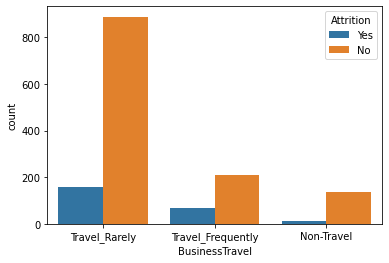

In [65]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

<AxesSubplot:xlabel='Department', ylabel='count'>

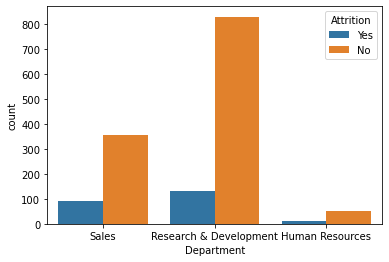

In [66]:
sns.countplot(x='Department',hue='Attrition',data=df)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

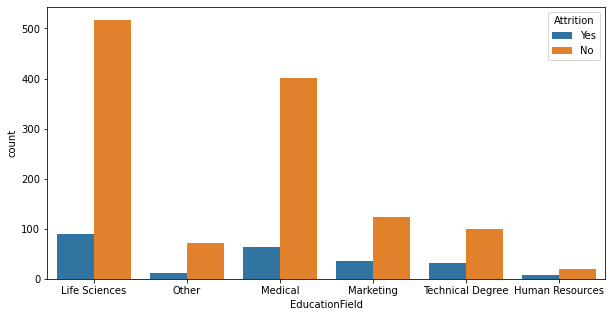

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',hue='Attrition',data=df)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

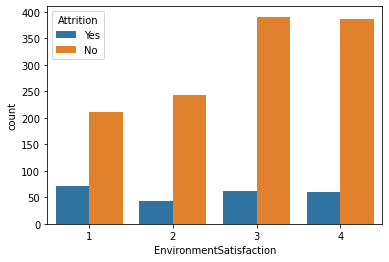

In [68]:
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

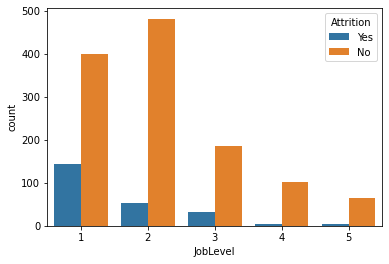

In [69]:
sns.countplot(x='JobLevel',hue='Attrition',data=df)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

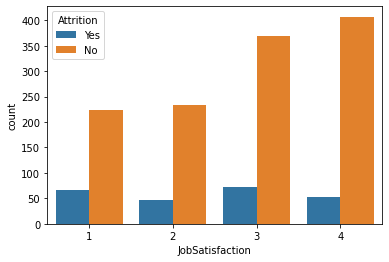

In [74]:
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

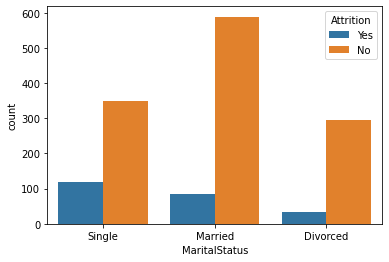

In [75]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

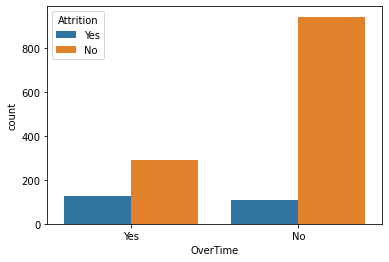

In [76]:
sns.countplot(x='OverTime',hue='Attrition',data=df)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

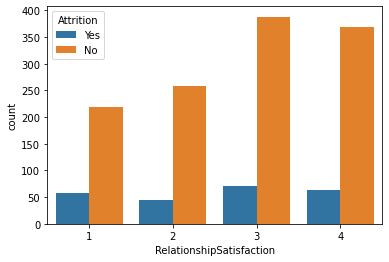

In [78]:
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=df)

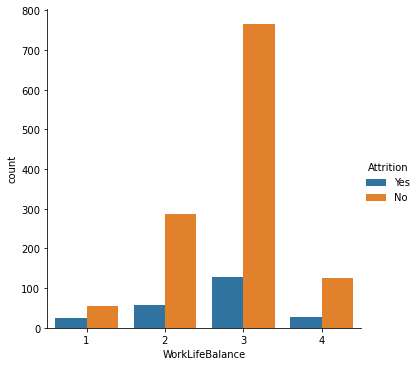

In [87]:
sns.catplot(kind='count',x='WorkLifeBalance',hue='Attrition',data=df)

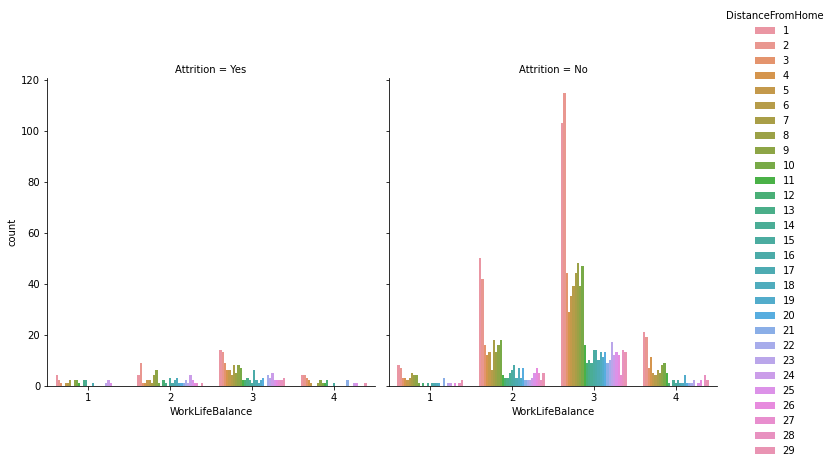

In [115]:
sns.catplot(kind='count',x='WorkLifeBalance',hue='DistanceFromHome',col='Attrition',data=df)

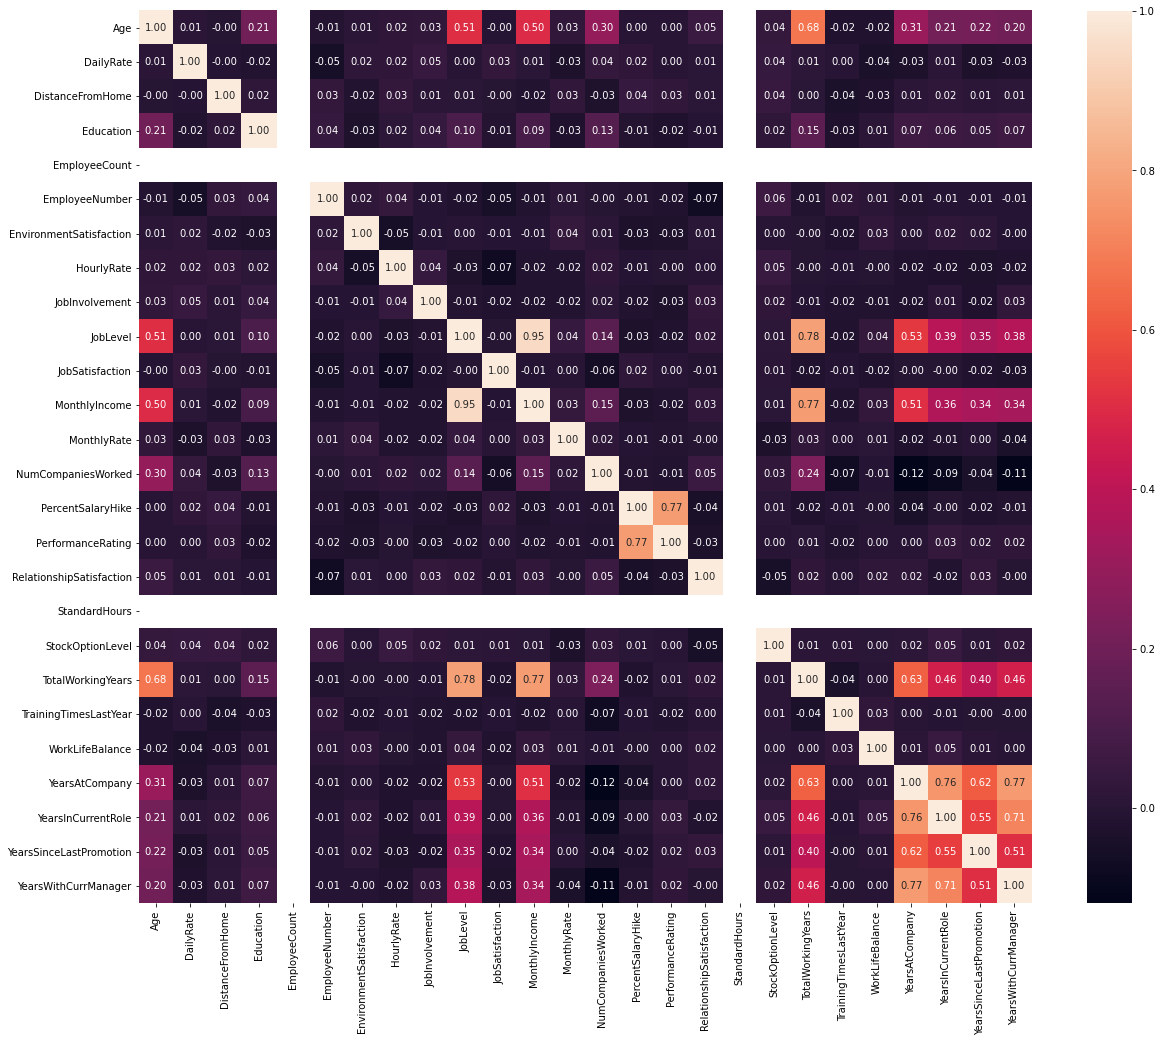

In [116]:
corr=df.corr()

plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

In [122]:
df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [123]:
from scipy.stats import zscore

z_score=zscore(df[['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
new_df=df[filtering_entry]

new_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,36.258111,806.054074,9.176640,2.896179,2.725306,65.847152,2.733237,1.956020,2.741168,6025.912040,...,3.152848,2.703677,0.795963,10.302091,2.803893,2.762797,6.104542,3.867340,1.775775,3.800288
std,8.838767,403.163183,8.088602,1.023198,1.090541,20.280564,0.709296,1.015862,1.100990,4248.299591,...,0.359971,1.081529,0.856710,6.699832,1.291737,0.705043,4.679161,3.244441,2.499533,3.258874
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,467.500000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2847.500000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,807.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4739.000000,...,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,1160.000000,14.000000,4.000000,4.000000,83.000000,3.000000,2.000000,4.000000,7325.000000,...,3.000000,4.000000,1.000000,13.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19943.000000,...,4.000000,4.000000,3.000000,34.000000,6.000000,4.000000,25.000000,15.000000,11.000000,14.000000


In [124]:
df.shape

(1470, 31)

In [125]:
new_df.shape

(1387, 31)